# Linear Prediction. Mel-frequency Cepstrum Coefficients

## Libraries Import

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as pyplot
import numpy as np
import scipy as sp

## Configuration

In [2]:
SOUNDS_FOLDER = "sounds/"
USED_SOUND_FILENAME = SOUNDS_FOLDER + "a.wav"
OFFSET_DURATION_IN_SECONDS = 1
LOADED_DURATION_IN_MS = 25
FRAME_LENGTH = 25
HOP_LENGTH = 10
ENERGY_THRESHOLD = 0.035
FILTER_ORDER = 8

## Linear Prediction

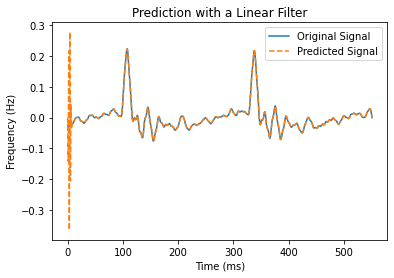

In [3]:
# Read a frame from the file
y, _ = librosa.load(USED_SOUND_FILENAME, duration=LOADED_DURATION_IN_MS * 0.001, offset=OFFSET_DURATION_IN_SECONDS)

# Compute the linear prediction coefficients
coeffs = librosa.lpc(y, FILTER_ORDER)
coeffs_stacked = np.hstack([[0], -1 * coeffs[1:]])
y_pred = sp.signal.lfilter(coeffs_stacked, [1], y)

# Plot
fig, ax = pyplot.subplots()
ax.plot(y)
ax.plot(y_pred, linestyle="--")
ax.legend(["Original Signal", "Predicted Signal"])
ax.set_title("Prediction with a Linear Filter")
pyplot.xlabel("Time (ms)")
pyplot.ylabel("Frequency (Hz)")
pyplot.show()

## Determinarea și Filtrarea Energiei Sunetului Vocalei "*a*"


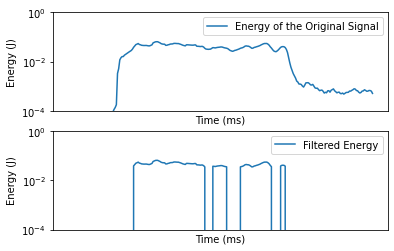

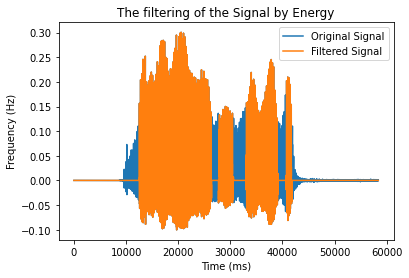

In [4]:
# Read the signal
y, sample_rate = librosa.load(USED_SOUND_FILENAME)
rms = librosa.feature.rms(y=y)

# Get the signal duration
points_in_ms = int(sample_rate / 1000)
duration = int(len(y) / points_in_ms)

# Compute the length of the frames and of the space between them
samples_in_ms = int(sample_rate / 1000)
samples_in_frame = FRAME_LENGTH * samples_in_ms
samples_in_hop = HOP_LENGTH * samples_in_ms

# Compute the energy for each frame
rms = librosa.feature.rms(y=y, frame_length=samples_in_frame, hop_length=samples_in_hop)
rms = rms[0]

# Filter the energy
filtered_rms = [rms_val if rms_val > ENERGY_THRESHOLD else 0 for rms_val in rms]
filtered_rms = np.array(filtered_rms)

# Plot
fig, ax = pyplot.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms, label="Energy of the Original Signal")
ax[0].set(xticks=[])
ax[0].set_ylim(0.0001, 1)
ax[0].set_xticks(np.arange(0, duration + 1, 2))
ax[0].legend()
ax[0].label_outer()
times = librosa.times_like(filtered_rms)
ax[1].semilogy(times, filtered_rms, label="Filtered Energy")
ax[0].set(xticks=[])
ax[1].set_ylim(0.0001, 1)
ax[1].legend()
ax[1].label_outer()
pyplot.setp(ax, xlabel="Time (ms)")
pyplot.setp(ax, ylabel="Energy (J)")
pyplot.show()

# Filter the signal by energy
samples_in_period = len(y) // len(filtered_rms) + 1
filtered_y = []
for index, y_sample in enumerate(y):
    if (filtered_rms[index // samples_in_period] > 0):
        filtered_y.append(y_sample)
    else:
        filtered_y.append(0)

# Plot
fig, ax = pyplot.subplots()
ax.plot(y)
ax.plot(filtered_y)
ax.legend(["Original Signal", "Filtered Signal"])
ax.set_title("The filtering of the Signal by Energy")
pyplot.xlabel("Time (ms)")
pyplot.ylabel("Frequency (Hz)")
pyplot.show()

## Mel-frequency Cepstrum Coefficients

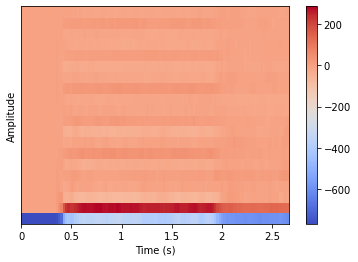

In [5]:
# Compute the coefficients
mfccs = librosa.feature.mfcc(y=y, sr=sample_rate)

# Plot
img = librosa.display.specshow(mfccs, x_axis="time")
pyplot.colorbar(img)
ax.set_title("Mel-frequency Cepstrum Coefficients")
pyplot.xlabel("Time (s)")
pyplot.ylabel("Amplitude")
pyplot.show()